In [1]:
import sys
from pathlib import Path
import json
import pymc as pm



project_root = Path().resolve().parent  # one level up from notebooks/
sys.path.append(str(project_root))


from fantasy_optimizer.api_client import fetch_bootstrap_static

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.


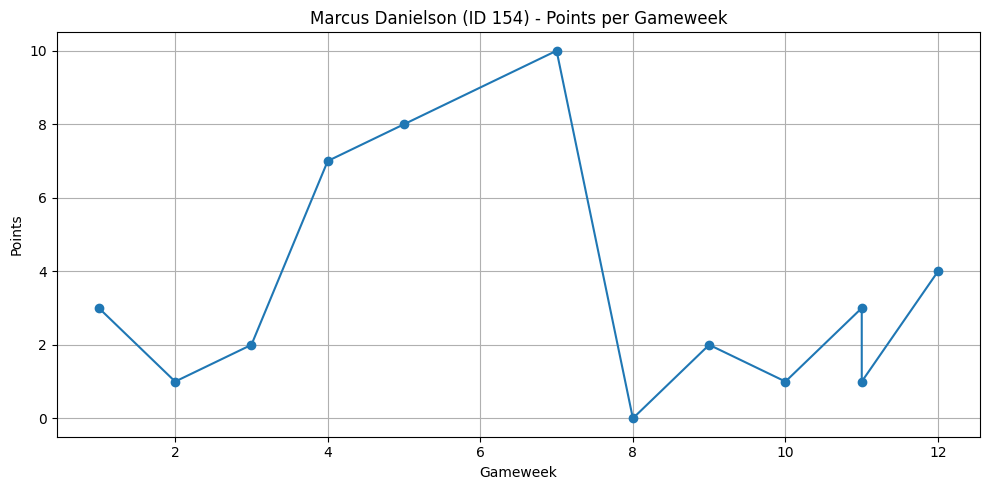

In [2]:

# Load player gameweek stats
DATA_DIR = project_root / "data"
df = pd.read_parquet(DATA_DIR / "player_gameweek_stats.parquet")

# Fetch player metadata
bootstrap = fetch_bootstrap_static()
players = pd.DataFrame(bootstrap["elements"])

# Select a player by name
selected_name = "Danielson"  # Change this to any last name or part of a name
selected = players[players["second_name"].str.contains(selected_name, case=False)]

if selected.empty:
    raise ValueError(f"No player found matching: {selected_name}")

player_id = selected.iloc[0]["id"]
full_name = f"{selected.iloc[0]['first_name']} {selected.iloc[0]['second_name']}"

# Filter gameweek data for the selected player
player_gw = df[df["element"] == player_id].sort_values("round")

# Plot points per gameweek
plt.figure(figsize=(10, 5))
plt.plot(player_gw["round"], player_gw["total_points"], marker="o")
plt.title(f"{full_name} (ID {player_id}) - Points per Gameweek")
plt.xlabel("Gameweek")
plt.ylabel("Points")
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
for item in bootstrap.items():
    print(f"{item[0]}: {len(item[1]) if isinstance(item[1], list) else item[1]}")

chips: 5
events: 30
game_settings: {'league_join_private_max': 20, 'league_join_public_max': 3, 'league_max_size_public_classic': 20, 'league_max_size_public_h2h': 16, 'league_max_size_private_h2h': 16, 'league_max_ko_rounds_private_h2h': 3, 'league_prefix_public': 'Allsvenskan', 'league_points_h2h_win': 3, 'league_points_h2h_lose': 0, 'league_points_h2h_draw': 1, 'league_ko_first_instead_of_random': False, 'cup_start_event_id': None, 'cup_stop_event_id': None, 'cup_qualifying_method': None, 'cup_type': None, 'featured_entries': [], 'element_sell_at_purchase_price': False, 'percentile_ranks': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 95, 90, 95], 'underdog_differential': 0, 'squad_squadplay': 11, 'squad_squadsize': 15, 'squad_special_min': None, 'squad_special_max': None, 'squad_team_limit': 3, 'squad_total_spend': 1000, 'ui_currency_multiplier': 10, 'ui_use_special_shirts': False, 'ui_special_shirt_exclusions': [], 'stats_form_days': 30, 'sys_vice_captain_enab

In [4]:
events_df = pd.DataFrame(bootstrap["events"])
print("Events DataFrame:")
events_df

Events DataFrame:


,id,name,deadline_time,release_time,average_entry_score,finished,data_checked,highest_scoring_entry,deadline_time_epoch,deadline_time_game_offset,...,ranked_count,overrides,chip_plays,most_selected,most_transferred_in,top_element,top_element_info,transfers_made,most_captained,most_vice_captained
0,1,Omgång 1,2025-03-29T13:55:00Z,None,56,True,True,3780.0,1743256500,0,...,59555,"{'rules': {}, 'scoring': {}, 'element_types': ...","[{'chip_name': 'pdbus', 'num_played': 1033}, {...",260.0,1.0,328.0,"{'id': 328, 'points': 29}",0,230.0,258.0
1,2,Omgång 2,2025-04-05T12:55:00Z,None,54,True,True,20491.0,1743857700,0,...,63963,"{'rules': {}, 'scoring': {}, 'element_types': ...","[{'chip_name': 'wildcard', 'num_played': 1404}...",260.0,328.0,155.0,"{'id': 155, 'points': 14}",37406,39.0,258.0
2,3,Omgång 3,2025-04-12T12:55:00Z,None,54,True,True,40491.0,1744462500,0,...,65373,"{'rules': {}, 'scoring': {}, 'element_types': ...","[{'chip_name': 'wildcard', 'num_played': 1685}...",260.0,230.0,290.0,"{'id': 290, 'points': 14}",60253,39.0,230.0
3,4,Omgång 4,2025-04-18T12:55:00Z,None,51,True,True,15470.0,1744980900,0,...,65971,"{'rules': {}, 'scoring': {}, 'element_types': ...","[{'chip_name': 'wildcard', 'num_played': 1936}...",230.0,270.0,102.0,"{'id': 102, 'points': 14}",67769,230.0,39.0
4,5,Omgång 5,2025-04-23T16:55:00Z,None,60,True,True,40418.0,1745427300,0,...,66527,"{'rules': {}, 'scoring': {}, 'element_types': ...","[{'chip_name': 'wildcard', 'num_played': 1362}...",230.0,270.0,67.0,"{'id': 67, 'points': 14}",54676,230.0,230.0
5,6,Omgång 6,2025-04-27T11:55:00Z,None,53,True,True,23272.0,1745754900,0,...,66970,"{'rules': {}, 'scoring': {}, 'element_types': ...","[{'chip_name': 'wildcard', 'num_played': 2123}...",230.0,99.0,283.0,"{'id': 283, 'points': 17}",67727,230.0,230.0
6,7,Omgång 7,2025-05-03T12:55:00Z,None,58,True,True,66758.0,1746276900,0,...,67475,"{'rules': {}, 'scoring': {}, 'element_types': ...","[{'chip_name': 'wildcard', 'num_played': 1825}...",230.0,283.0,39.0,"{'id': 39, 'points': 15}",58962,230.0,230.0
7,8,Omgång 8,2025-05-10T12:55:00Z,None,39,True,True,67823.0,1746881700,0,...,67880,"{'rules': {}, 'scoring': {}, 'element_types': ...","[{'chip_name': 'wildcard', 'num_played': 1359}...",230.0,270.0,107.0,"{'id': 107, 'points': 12}",53405,39.0,230.0
8,9,Omgång 9,2025-05-14T16:55:00Z,None,42,True,True,5532.0,1747241700,0,...,68082,"{'rules': {}, 'scoring': {}, 'element_types': ...","[{'chip_name': 'wildcard', 'num_played': 1571}...",230.0,21.0,406.0,"{'id': 406, 'points': 18}",48561,230.0,230.0
9,10,Omgång 10,2025-05-18T11:55:00Z,None,97,True,True,13755.0,1747569300,0,...,68238,"{'rules': {}, 'scoring': {}, 'element_types': ...","[{'chip_name': 'wildcard', 'num_played': 991},...",260.0,406.0,422.0,"{'id': 422, 'points': 18}",75800,39.0,39.0


In [5]:
elements_df = pd.DataFrame(bootstrap["elements"])
elements_df.head()

,can_transact,can_select,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,...,penalties_missed,yellow_cards,red_cards,saves,own_goals,attacking_bonus,defending_bonus,winning_goals,key_passes,clearances_blocks_interceptions
0,True,True,NaN,NaN,177189,0,0,1,-1,0,...,0,0,0,17,0,0,0,0,0,65
1,True,True,0.0,0.0,52251,0,0,-1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,True,True,NaN,NaN,515046,0,0,-1,1,0,...,0,0,0,2,0,0,0,0,0,26
3,True,True,NaN,NaN,501260,0,0,2,-2,1,...,0,2,0,0,0,5,12,0,15,131
4,True,True,0.0,0.0,61810,0,0,-1,1,1,...,0,2,0,0,0,0,10,0,2,94


# Model Time

In [6]:
def compute_team_metrics(df: pd.DataFrame, window: int = 3) -> pd.DataFrame:
    
    df = df.sort_values(["team", "round"])
    df["team_form"] = df.groupby("team")["team_score"].transform(lambda x: x.shift(1).rolling(window).mean())
    df = df.sort_values(["opponent_team", "round"])

    df["opponent_strength"] = df.groupby("opponent_team")["opponent_score"].transform(lambda x: x.shift(1).rolling(window).mean())
    df = df.sort_values(["team", "round"])

    df[['team_form', 'opponent_strength']] = df[['team_form', 'opponent_strength']].fillna(0)
    return df

def extract_past_season_priors(past_stats: pd.DataFrame) -> dict:
    # Average over seasons
    mu_minutes = past_stats["minutes_per_game"].mean()
    mu_points = past_stats["points_per_game"].mean()

    return {
        "alpha_m_mu": mu_minutes,
        "alpha_y_mu": mu_points,
        "sigma_m": past_stats["minutes_per_game"].std(),
        "sigma_y": past_stats["points_per_game"].std()
    }



In [7]:
player_id = 154
DATA_DIR = project_root / "data"

file_path = DATA_DIR / "player_histories" / f"{player_id}.json"
with open(file_path) as f:
    raw = json.load(f)


history = pd.DataFrame(raw["history"])
history_past = pd.DataFrame(raw["history_past"])
history_past['minutes_per_game'] = history_past['minutes'] / 30
history_past['points_per_game'] = history_past['total_points'] / 30
fixtures_future = pd.DataFrame(raw["fixtures"])
fixtures_past = pd.read_parquet(DATA_DIR / "fixtures.parquet")
fixtures_past = fixtures_past.dropna(subset=["team_score", "opponent_score"])
players = pd.DataFrame(bootstrap["elements"])

selected = players[players["id"] == player_id]

# Filter gameweek data for the selected player
player_df = df[df["element"] == player_id].sort_values("round")
player_df = player_df.merge(elements_df[["id", "team"]], left_on="element", right_on="id", how="left")
player_team_id = player_df["team"].iloc[0]
player_df.sort_values("round", inplace=True)


fixtures_past = compute_team_metrics(fixtures_past)
past_season_stats = extract_past_season_priors(history_past)

In [8]:
past_season_stats

{'alpha_m_mu': np.float64(66.98666666666666),
 'alpha_y_mu': np.float64(3.9199999999999995),
 'sigma_m': np.float64(19.127214468744093),
 'sigma_y': np.float64(1.6644318349915486)}

In [9]:
def simulate_player(points, minutes, form, opp_strength, was_home, priors):
    results = []
    for t in range(5):
        with pm.Model() as model:
            # Minutes model
            alpha_m = pm.Normal("alpha_m", mu=priors["alpha_m_mu"], sigma=10)
            beta_form_m = pm.Normal("beta_form_m", mu=0, sigma=1)
            beta_opp_m = pm.Normal("beta_opp_m", mu=0, sigma=1)
            beta_home_m = pm.Normal("beta_home_m", mu=0, sigma=1)
            sigma_m = pm.HalfNormal("sigma_m", sigma=priors["sigma_m"])

            mu_m = (alpha_m +
                    beta_form_m * form[t] +
                    beta_opp_m * opp_strength[t] +
                    beta_home_m * was_home[t])
            m_t = pm.Normal("minutes", mu=mu_m, sigma=sigma_m, observed=minutes[t])

            # Points model
            alpha_y = pm.Normal("alpha_y", mu=priors["alpha_y_mu"], sigma=5)
            gamma = pm.Normal("gamma", mu=0.05, sigma=0.1)
            beta_form_y = pm.Normal("beta_form_y", mu=0, sigma=1)
            beta_opp_y = pm.Normal("beta_opp_y", mu=0, sigma=1)
            beta_home_y = pm.Normal("beta_home_y", mu=0, sigma=1)
            sigma_y = pm.HalfNormal("sigma_y", sigma=priors["sigma_y"])

            mu_y = (alpha_y +
                    gamma * np.log(minutes[t] + 1e-3) +
                    beta_form_y * form[t] +
                    beta_opp_y * opp_strength[t] +
                    beta_home_y * was_home[t])
            y_t = pm.Normal("points", mu=mu_y, sigma=sigma_y, observed=points[t])

            trace = pm.sample(1000, tune=500, chains=2, cores=1, progressbar=True)

        results.append(trace)
        priors["alpha_m_mu"] = trace.posterior["alpha_m"].mean().item()
        priors["sigma_m"] = trace.posterior["sigma_m"].mean().item()
        priors["alpha_y_mu"] = trace.posterior["alpha_y"].mean().item()
        priors["sigma_y"] = trace.posterior["sigma_y"].mean().item()
        
    return results


In [10]:
simulation_df = player_df.merge(fixtures_past[["team", "round", "team_form", "opponent_strength", "opponent_team", "was_home"]], on = ["round", "team", "opponent_team", "was_home"], how="inner")

simulation_df

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,minutes,goals_scored,...,penalties_missed,yellow_cards,red_cards,saves,bonus,round,id,team,team_form,opponent_strength
0,154,1,1,3,True,2025-03-29T14:00:00Z,0,1,90,0,...,0,0,0,0,0,1,154,7,0.000000,0.000000
1,154,16,3,1,False,2025-04-05T13:00:00Z,0,1,3,0,...,0,0,0,0,0,2,154,7,0.000000,0.000000
2,154,20,2,2,False,2025-04-13T12:00:00Z,2,0,90,0,...,0,0,0,0,0,3,154,7,0.000000,0.000000
3,154,32,30,7,True,2025-04-21T12:00:00Z,0,0,90,0,...,0,0,0,0,0,4,154,7,0.333333,1.000000
4,154,37,26,8,True,2025-04-24T17:00:00Z,1,0,90,0,...,0,0,0,0,0,5,154,7,0.333333,0.666667
5,154,51,12,10,True,2025-05-04T12:00:00Z,1,1,90,1,...,0,0,0,0,0,7,154,7,0.333333,1.666667
6,154,64,4,0,False,2025-05-12T17:10:00Z,1,2,90,0,...,0,0,0,0,0,8,154,7,0.666667,1.333333
7,154,68,14,2,True,2025-05-15T17:00:00Z,1,3,90,0,...,0,0,0,0,0,9,154,7,1.333333,2.000000
8,154,78,5,1,False,2025-05-19T17:10:00Z,4,0,45,0,...,0,0,0,0,0,10,154,7,1.333333,2.333333
9,154,87,6,3,True,2025-05-25T14:30:00Z,1,1,90,0,...,0,0,0,0,0,11,154,7,1.000000,1.666667


In [11]:
results = simulate_player(
    points=simulation_df["total_points"].values,
    minutes=simulation_df["minutes"].values,
    form=simulation_df["team_form"].values,
    opp_strength=simulation_df["opponent_strength"].values,
    was_home=simulation_df["was_home"].values,
    priors=past_season_stats
)

Initializing NUTS using jitter+adapt_diag...
c:\Users\axele\OneDrive\Documents\fantasy-allsvenskan\fantasy\Lib\site-packages\pytensor\tensor\rewriting\elemwise.py:1003: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(
Sequential sampling (2 chains in 1 job)
NUTS: [alpha_m, beta_form_m, beta_opp_m, beta_home_m, sigma_m, alpha_y, gamma, beta_form_y, beta_opp_y, beta_home_y, sigma_y]


Output()

Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 152 seconds.
There were 388 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Initializing NUTS using jitter+adapt_diag...
c:\Users\axele\OneDrive\Documents\fantasy-allsvenskan\fantasy\Lib\site-packages\pytensor\tensor\rewriting\elemwise.py:1003: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(
Sequential sampling (2 chains in 1 job)
NUTS: [alpha_m, beta_form_m, beta_opp_m, beta_home_m, sigma_m, al

Output()

Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 153 seconds.
There were 185 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Initializing NUTS using jitter+adapt_diag...
c:\Users\axele\OneDrive\Documents\fantasy-allsvenskan\fantasy\Lib\site-packages\pytensor\tensor\rewriting\elemwise.py:1003: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(
Sequential sampling (2 chains in 1 job)
NUTS: [alpha_m, beta_form_m, beta_opp_m, beta_home_m, sigma_m, alpha_y, gamma, beta_form_y, beta_opp_y, beta_home_y, sigma_y]


Output()

Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 131 seconds.
There were 391 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Initializing NUTS using jitter+adapt_diag...
c:\Users\axele\OneDrive\Documents\fantasy-allsvenskan\fantasy\Lib\site-packages\pytensor\tensor\rewriting\elemwise.py:1003: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(
Sequential sampling (2 chains in 1 job)
NUTS: [alpha_m, beta_form_m, beta_opp_m, beta_home_m, sigma_m, al

Output()

Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 123 seconds.
There were 426 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Initializing NUTS using jitter+adapt_diag...
c:\Users\axele\OneDrive\Documents\fantasy-allsvenskan\fantasy\Lib\site-packages\pytensor\tensor\rewriting\elemwise.py:1003: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(
Sequential sampling (2 chains in 1 job)
NUTS: [alpha_m, beta_form_m, beta_opp_m, beta_home_m, sigma_m, al

Output()

Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 132 seconds.
There were 582 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


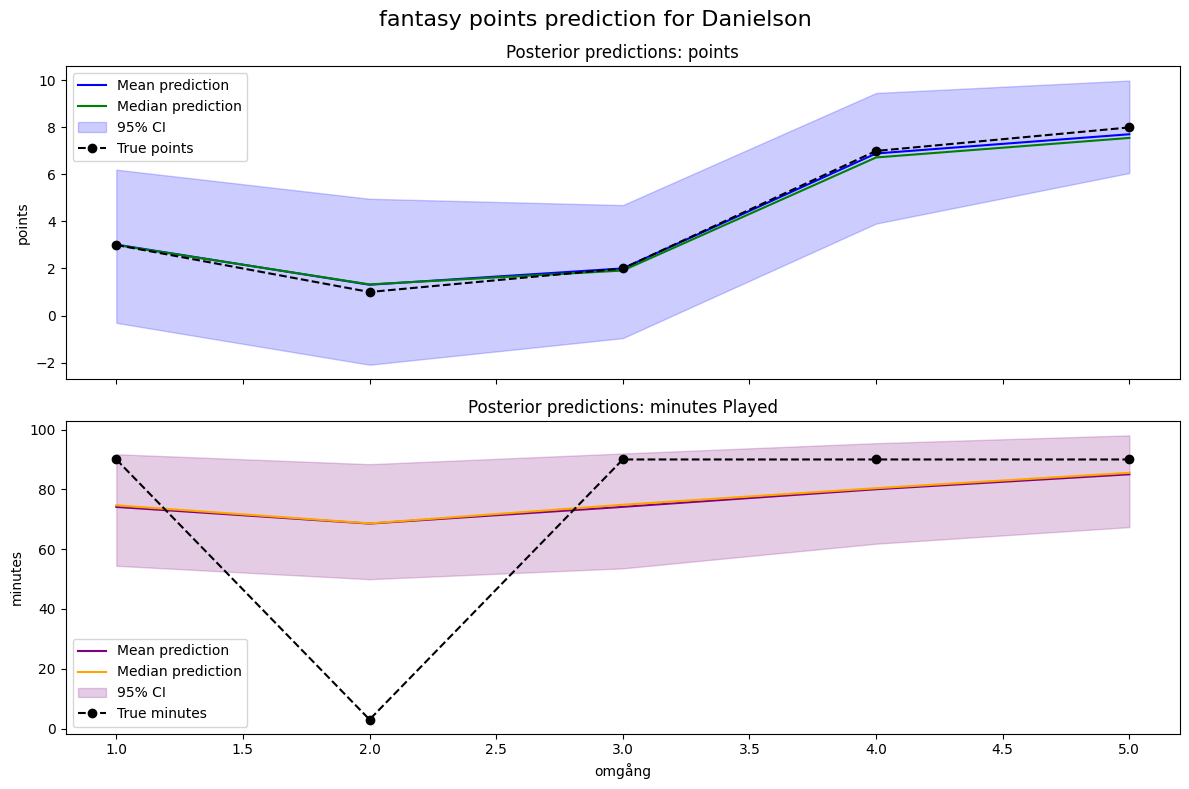

In [30]:
def visualize_simulation(name, results, true_points, true_minutes, true_form, true_opp_strength, true_was_home):
    """
    Visualize posterior estimates for points and minutes per game.
    Includes median, mean, 95% CI, and true values from observed_data.
    """
    n_games = len(results)
    point_means, point_medians, point_lows, point_highs = [], [], [], []
    minute_means, minute_medians, minute_lows, minute_highs = [], [], [], []

    for idata in results:
        # Points from posterior (model parameter for mu_y)
        y_samples = idata.posterior["alpha_y"].values + \
                    idata.posterior["gamma"].values * np.log(true_minutes + 1e-3)[0] + \
                    idata.posterior["beta_form_y"].values * true_form[0] + \
                    idata.posterior["beta_opp_y"].values * true_opp_strength[0] + \
                    idata.posterior["beta_home_y"].values * true_was_home[0]

        y_samples = y_samples.reshape(-1)
        point_means.append(y_samples.mean())
        point_medians.append(np.median(y_samples))
        point_lows.append(np.percentile(y_samples, 2.5))
        point_highs.append(np.percentile(y_samples, 97.5))

        # Minutes from posterior (model parameter for mu_m)
        m_samples = idata.posterior["alpha_m"].values + \
                    idata.posterior["beta_form_m"].values * true_form[0] + \
                    idata.posterior["beta_opp_m"].values * true_opp_strength[0] + \
                    idata.posterior["beta_home_m"].values * true_was_home[0]

        m_samples = m_samples.reshape(-1)
        minute_means.append(m_samples.mean())
        minute_medians.append(np.median(m_samples))
        minute_lows.append(np.percentile(m_samples, 2.5))
        minute_highs.append(np.percentile(m_samples, 97.5))

    x = np.arange(1, n_games + 1)
    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    fig.suptitle(f"fantasy points prediction for {name}", fontsize=16)
    # Points
    axes[0].plot(x, point_means, label="Mean prediction", color="blue")
    axes[0].plot(x, point_medians, label="Median prediction", color="green")
    axes[0].fill_between(x, point_lows, point_highs, alpha=0.2, color="blue", label="95% CI")
    axes[0].plot(x, true_points, "o--", label="True points", color="black")
    axes[0].set_ylabel("points")
    axes[0].set_title("Posterior predictions: points")
    axes[0].legend()

    # Minutes
    axes[1].plot(x, minute_means, label="Mean prediction", color="purple")
    axes[1].plot(x, minute_medians, label="Median prediction", color="orange")
    axes[1].fill_between(x, minute_lows, minute_highs, alpha=0.2, color="purple", label="95% CI")
    axes[1].plot(x, true_minutes, "o--", label="True minutes", color="black")
    axes[1].set_ylabel("minutes")
    axes[1].set_title("Posterior predictions: minutes Played")
    axes[1].set_xlabel("omgång")
    axes[1].legend()

    plt.tight_layout()
    plt.show()

visualize_simulation(
    selected_name,
    results,
    true_points=simulation_df["total_points"].values[:5],
    true_minutes=simulation_df["minutes"].values[:5],
    true_form=simulation_df["team_form"].values[:5],
    true_opp_strength=simulation_df["opponent_strength"].values[:5],
    true_was_home=simulation_df["was_home"].values[:5]
)